1. Importing Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import python_utils

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback 

print('done')

done


2.  Importing the Dataset "krisha"

In [17]:
df = pd.read_csv('newnew.csv')
df.head()

,Год,id,price,square,rooms,lat,lon
0,2016,674641098,40000000,99.0,3,51.134068,71.367502
1,2021,681148481,53999999,90.0,3,51.101005,71.401826
2,2021,681724680,31000000,62.0,2,51.172030,71.394117
3,2005,681619392,17500000,36.2,1,51.153648,71.500749
4,2020,58174444,75000000,86.7,3,51.102779,71.404300


In [18]:
df.describe()

,Год,id,price,square,rooms,lat,lon
count,2187.000000,2.187000e+03,2.187000e+03,2187.000000,2187.000000,2187.000000,2187.000000
mean,2013.202561,6.764468e+08,3.868365e+07,70.205688,2.121628,51.128470,71.431450
std,11.659222,4.685230e+07,4.599485e+07,46.516636,1.061177,0.239179,0.144116
min,1958.000000,1.363287e+07,5.700000e+06,13.000000,1.000000,43.238077,68.211424
25%,2010.000000,6.793429e+08,2.000000e+07,41.565000,1.000000,51.116350,71.395531
50%,2017.000000,6.811480e+08,2.700000e+07,58.100000,2.000000,51.133333,71.426216
75%,2021.000000,6.817389e+08,4.000000e+07,81.000000,3.000000,51.158096,71.465958
max,2022.000000,6.819111e+08,7.300000e+08,700.000000,11.000000,51.207335,76.898010


In [19]:
df.isna().sum()

Год       0
id        0
price     0
square    0
rooms     0
lat       0
lon       0
dtype: int64

3. Data Normalization


In [20]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,id,price,square,rooms,lat,lon
0,-0.038540,0.028620,0.619011,0.827734,0.023406,-0.443726
1,0.100351,0.333001,0.425532,0.827734,-0.114831,-0.205557
2,0.112650,-0.167055,-0.176403,-0.114616,0.182124,-0.259052
3,0.110402,-0.460566,-0.731044,-1.056966,0.105270,0.480853
4,-13.196199,0.789574,0.354590,0.827734,-0.107412,-0.188391


In [21]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value (y_pred):
    return int((y_pred*y_mean)/y_std)

4. Selecting features for X

In [22]:
x = df_norm.iloc[: ,2:6]
x.head()

,square,rooms,lat,lon
0,0.619011,0.827734,0.023406,-0.443726
1,0.425532,0.827734,-0.114831,-0.205557
2,-0.176403,-0.114616,0.182124,-0.259052
3,-0.731044,-1.056966,0.105270,0.480853
4,0.354590,0.827734,-0.107412,-0.188391


5. Selecting label Y

In [23]:
y = df_norm.iloc[: ,-5]
y.head()

0    0.028620
1    0.333001
2   -0.167055
3   -0.460566
4    0.789574
Name: price, dtype: float64

In [24]:
x_arr = x.values
y_arr = y.values

print(x_arr)
print(y_arr)

[[ 0.61901106  0.82773396  0.02340634 -0.44372626]
 [ 0.42553189  0.82773396 -0.11483089 -0.20555729]
 [-0.1764033  -0.11461595  0.18212377 -0.25905165]
 ...
 [ 0.64050874  0.82773396  0.00634383 -0.22232192]
 [-0.21939867 -0.11461595 -0.01427062 -0.49643837]
 [ 1.17795088  0.82773396 -0.06650527 -0.09709678]]
[ 0.02861955  0.33300141 -0.16705452 ...  0.52867551 -0.34098703
  1.52878743]


6. Creating Training and Test sets 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_arr,y_arr, test_size=0.1051, random_state=1)

print('train shape', x_train.shape, y_train.shape)
print('test shape', x_test.shape, y_test.shape)

train shape (1957, 4) (1957,)
test shape (230, 4) (230,)


7. Creating the Model for Price Prediction 


In [26]:
def get_model ():
    model = Sequential([
        Dense(10, input_shape=(4,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    
    model.compile(
        loss = 'mse',
        optimizer = 'adam'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                50        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 5)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


8. Training the Model

In [30]:
es_cb = EarlyStopping(monitor='val_loss', patience=6)

model = get_model()

preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 1000,
    callbacks = [es_cb]
)

8/8 [==============================] - 0s 2ms/step
Epoch 1/1000
62/62 [==============================] - 1s 5ms/step - loss: 0.8713 - val_loss: 0.9892
Epoch 2/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6642 - val_loss: 0.7933
Epoch 3/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4830 - val_loss: 0.6700
Epoch 4/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.3542 - val_loss: 0.5921
Epoch 5/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.2791 - val_loss: 0.5733
Epoch 6/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.2556 - val_loss: 0.5670
Epoch 7/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.2435 - val_loss: 0.5657
Epoch 8/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.2427 - val_loss: 0.5581
Epoch 9/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.2413 - val_loss: 0.5558
Epoch 10/1000
62/62 [============================

9. Plot of my model

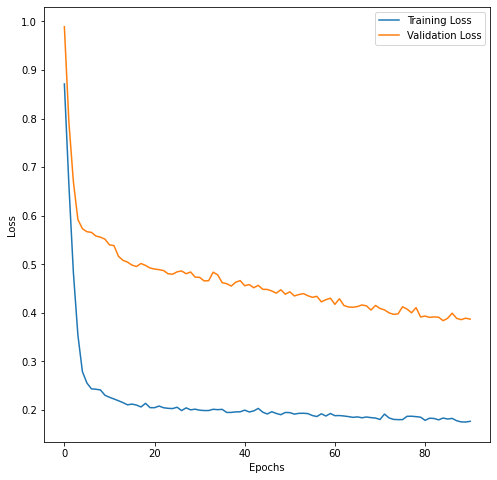

In [31]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

10. Prediction

8/8 [==============================] - 0s 2ms/step


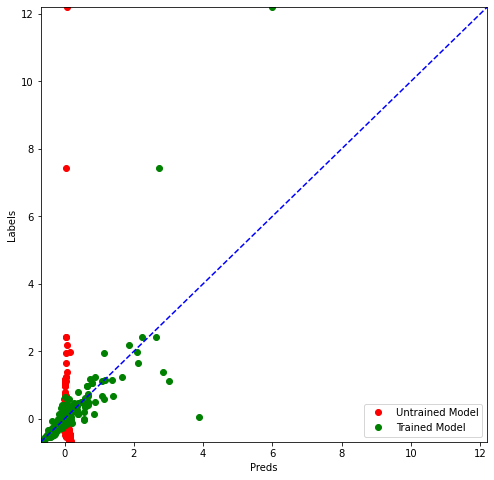

In [32]:
preds_on_trained = model.predict(x_test)


def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [33]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(pred):
    return int(pred * y_std + y_mean)

print(convert_label_actual(0.028620))

40000020
